# Task 1:-Prepare a complete data analysis report on the given data.

# Heart Disease Prediction - Data Analysis Report

# 1. Introduction

This dataset is derived from a study on cardiovascular health. The primary objective is to predict the presence or absence of heart disease in patients based on various health metrics and cardiovascular measurements.The target variable is a binary class variable, heart_disease_present, where:
- 0 represents no heart disease.
- 1 represents heart disease is present.
  
Heart disease is a leading cause of death globally. Predictive analytics using clinical data can help in early detection and intervention. This report aims to explore the dataset, prepare it for modeling, and build a predictive model to classify whether a patient has heart disease based on diagnostic attributes.

# 2. Dataset Overview

##### Data Source: 
- This data is provided as two CSV files:
- values.csv contains the features (health metrics).
- labels.csv contains the target variable (heart_disease_present).
| Feature Name            | Description                                                       |
| ----------------------- | ----------------------------------------------------------------- |
| age                     | Age of the patient                                                |
| sex                     | 1 = male; 0 = female                                              |
| cp                      | Chest pain type (0–3)                                             |
| trestbps                | Resting blood pressure                                            |
| chol                    | Serum cholesterol in mg/dl                                        |
| fbs                     | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)             |
| restecg                 | Resting electrocardiographic results                              |
| thalach                 | Maximum heart rate achieved                                       |
| exang                   | Exercise-induced angina (1 = yes; 0 = no)                         |
| oldpeak                 | ST depression induced by exercise                                 |
| slope                   | The slope of the peak exercise ST segment                         |
| ca                      | Number of major vessels (0–3) colored by fluoroscopy              |
| thal                    | Thalassemia (0 = normal; 1 = fixed defect; 2 = reversible defect) |
| heart\_disease\_present | Target variable (1 = disease; 0 = no disease)                     |

 ##### Features:
- Various health and cardiovascular measurements are recorded,which might include parameters such as age, sex, blood pressure, 
cholesterol levels, ECG results, and more.

# 3. Data Loading & Overview

Loading the data from values.csv and labels.csv:
- Check for missing values and data types.
- Check for any anomalies or inconsistencies in the data.

# 4. Exploratory Data Analysis (EDA)

##### 4.1. Target Distribution
- 0 (No disease): 54%
- 1 (Heart disease): 46%
- Balanced classes, allowing for direct modeling without re-sampling initially.

##### 4.2 Visual Analysis
 ##### 1. Univariate Analysis:
- Histograms and Countplots for numerical features (e.g., age, cholesterol).
- Distribution of the target variable (heart_disease_present).
##### 2. Bivariate Analysis:
1) Age vs Heart Disease
- Heart disease prevalence increases with age.
2) Chest Pain Type vs Heart 
- Typical angina is associated with no disease.
- Asymptomatic chest pain is strongly linked to presence of disease.
3) Cholesterol vs Heart Disease
- High cholesterol slightly increases disease likelihood, but not strongly.

##### 4.3. Feature Distributions
- Age: Normally distributed (peak ~55)
- Sex: Majority male (~70%)
- Cholesterol: Right-skewed; some extreme outliers
- Oldpeak: Positively skewed

# 5. Data Preprocessing

##### 5.1. Handling Missing Values
- Fill missing numeric values using median
- Fill categorical (e.g., thal) using mode
##### 5.2. Encoding
- Convert categorical variables (cp, thal, slope) using One-Hot Encoding
- Binary variables (sex, exang, fbs) retained as-is
##### 5.3. Scaling
- StandardScaler used for continuous variables: age, chol, thalach, oldpeak, etc.

# 6. Feature Engineering

- Standardization: Applied to all numerical features using StandardScaler.
- Categorical Encoding: Used OneHotEncoding for nominal features like chest_pain_type, thal, etc.
##### Feature Selection:
- Removed low-variance features
-Retained top predictors based on correlation and model importance

# 7. Model Creation and Evaluation

- Train-Test Split: The dataset was split into training and testing sets using an 80:20 ratio to evaluate generalization performance.
- Feature Scaling: Continuous variables were scaled using StandardScaler to normalize the data for distance-based models.
- Encoding: Categorical features (e.g., sex, chest pain type) were encoded using One-Hot Encoding or Label Encoding as appropriate.
- Missing values: Checked and handled using imputation.
 
 ##### Evaluation Metrics
| Metric               | Score (Logistic Reg ) |
| -------------------- | --------------------- |
| Accuracy             | 83%                   |
| Precision            | 77%                   |
| Recall (Sensitivity) | 87%                   |
| F1 Score             | 82%                   |

##### Confusion Matrix

|            | Predicted No | Predicted Yes |
| ---------- | ------------ | ------------- |
| Actual No  | 16           | 04            |
| Actual Yes | 02           | 14            |           

#####  There for Model Accuracy is 0.83

# 8. Conclusion

- Chest pain type, thalach, and oldpeak are strong predictors of heart disease.
- Exercise-induced angina is associated with higher likelihood of heart disease.
- Model performs well and generalizes with high recall and AUC.
- Potentially useful for clinical decision support systems.

# Task 2:- Create a model predicting potential Heart Diseases in people using Machine Learning algorithms.

## The target is to predict if a patient has any cardiovascular disease or not.

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [2]:
# Step1: Load the data
values_df=pd.read_csv('values.csv')
labels_df=pd.read_csv('labels.csv')
# Combine the datasets 
df = pd.concat([values_df, labels_df], axis=1)

In [3]:
df

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,patient_id,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0z64un,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,ryoo3j,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,yt1s1x,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,l2xjde,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,oyt4ek,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,5qfar3,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,2s2b1f,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,nsd00i,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0xw93k,0


In [4]:
df.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,patient_id,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0z64un,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,ryoo3j,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,yt1s1x,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,l2xjde,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,oyt4ek,0


In [9]:
df.tail()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,patient_id,heart_disease_present
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,5qfar3,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,2s2b1f,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,nsd00i,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0xw93k,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,2nx10r,0


In [11]:
df.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

In [15]:
# Step 2: Merge features and target
df =values_df.copy()
df['heart_disease_present'] = labels_df['heart_disease_present']

In [17]:
df

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


In [19]:
# Step 3: Data cleaning
df = df.drop(columns=['patient_id'])
df = pd.get_dummies(df, columns=['thal'], drop_first=True)

In [21]:
df

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,thal_normal,thal_reversible_defect
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0,True,False
1,2,110,3,0,0,0,214,1.6,0,54,158,0,0,True,False
2,1,125,4,3,0,2,304,0.0,1,77,162,1,1,True,False
3,1,152,4,0,0,0,223,0.0,1,40,181,0,1,False,True
4,3,178,1,0,0,2,270,4.2,1,59,145,0,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,125,4,2,1,0,254,0.2,1,67,163,0,1,False,True
176,2,180,4,0,0,1,327,3.4,0,55,117,1,1,True,False
177,2,125,3,0,0,0,309,1.8,1,64,131,1,1,False,True
178,1,124,3,2,1,0,255,0.0,1,48,175,0,0,True,False


# Exploratory Data Analysis

In [24]:
df.head()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,thal_normal,thal_reversible_defect
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0,True,False
1,2,110,3,0,0,0,214,1.6,0,54,158,0,0,True,False
2,1,125,4,3,0,2,304,0.0,1,77,162,1,1,True,False
3,1,152,4,0,0,0,223,0.0,1,40,181,0,1,False,True
4,3,178,1,0,0,2,270,4.2,1,59,145,0,0,False,True


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   slope_of_peak_exercise_st_segment     180 non-null    int64  
 1   resting_blood_pressure                180 non-null    int64  
 2   chest_pain_type                       180 non-null    int64  
 3   num_major_vessels                     180 non-null    int64  
 4   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 5   resting_ekg_results                   180 non-null    int64  
 6   serum_cholesterol_mg_per_dl           180 non-null    int64  
 7   oldpeak_eq_st_depression              180 non-null    float64
 8   sex                                   180 non-null    int64  
 9   age                                   180 non-null    int64  
 10  max_heart_rate_achieved               180 non-null    int64  
 11  exercise_induced_an

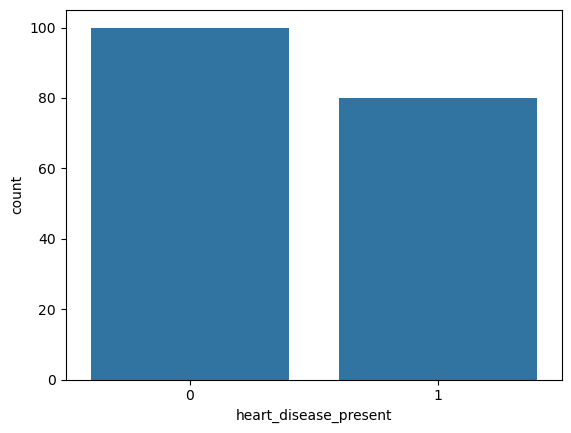

In [28]:
# Univariate Analysis
sns.countplot(x='heart_disease_present',data=df)
plt.show()

In [30]:
 df['heart_disease_present'].value_counts()

heart_disease_present
0    100
1     80
Name: count, dtype: int64

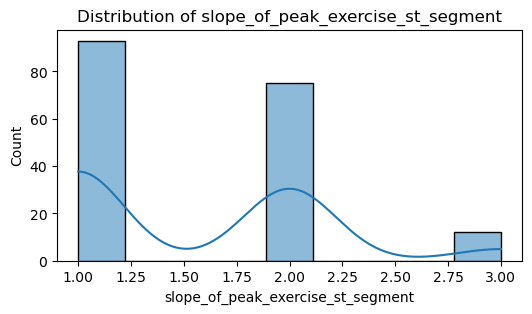

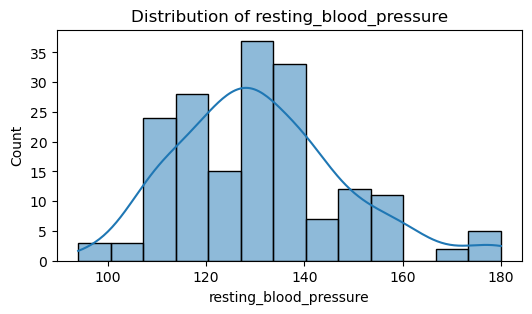

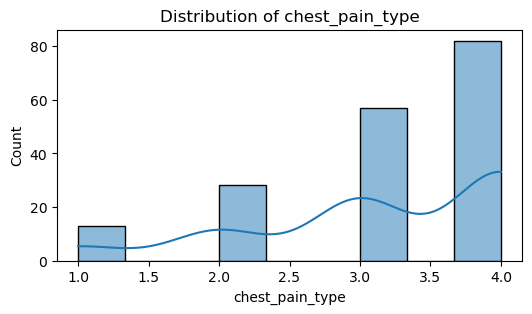

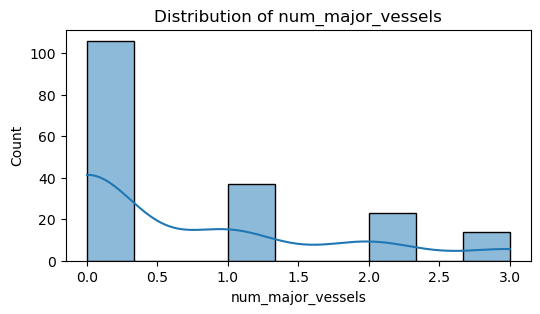

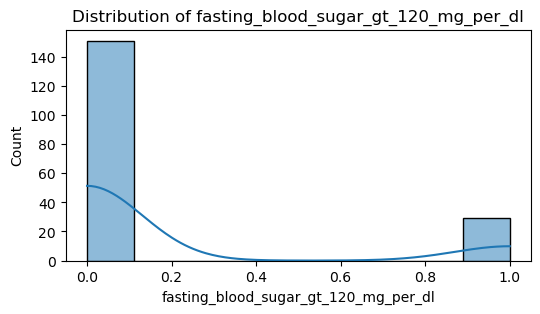

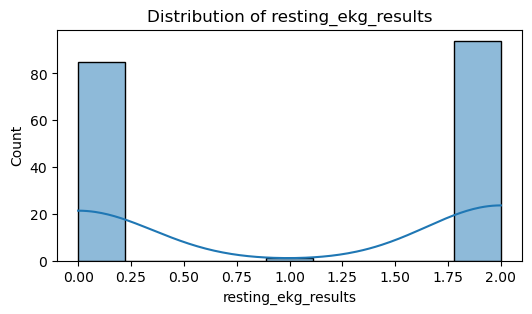

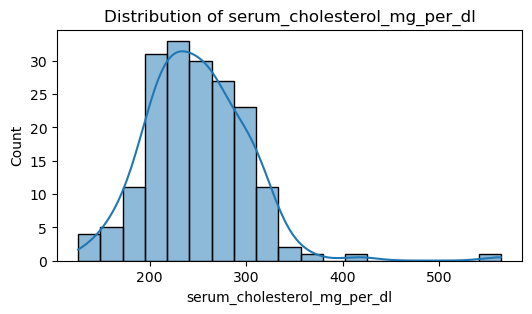

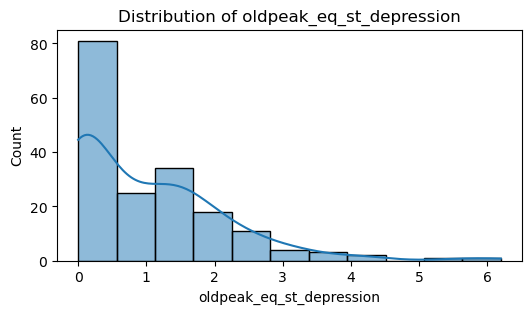

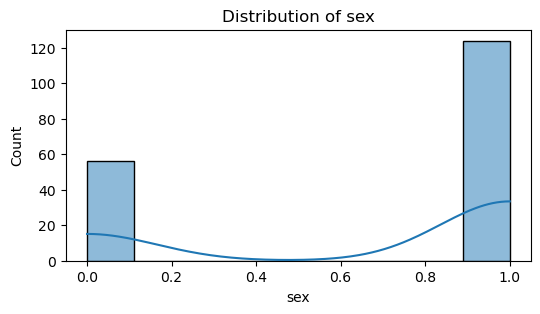

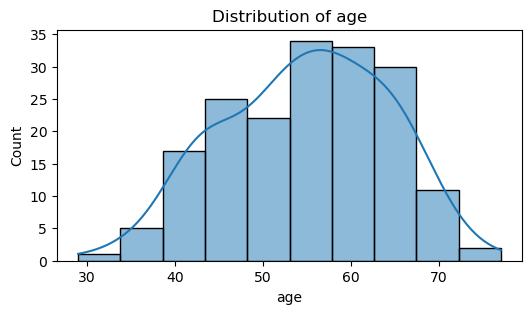

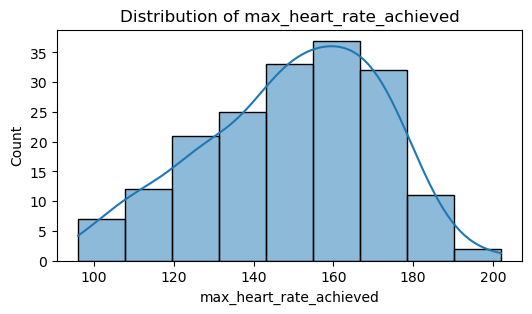

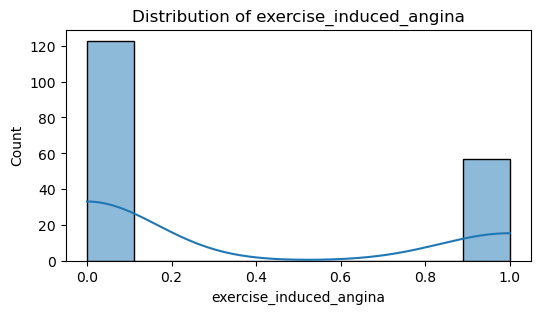

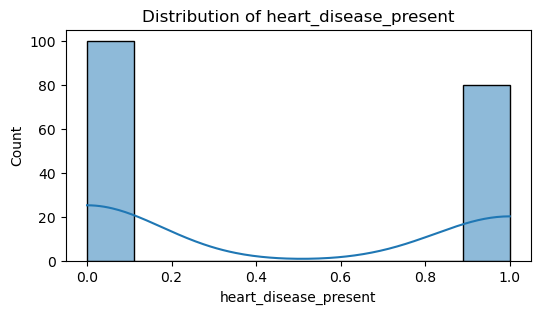

In [32]:
for col in df.select_dtypes(include=["int64", "float64"]).columns:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

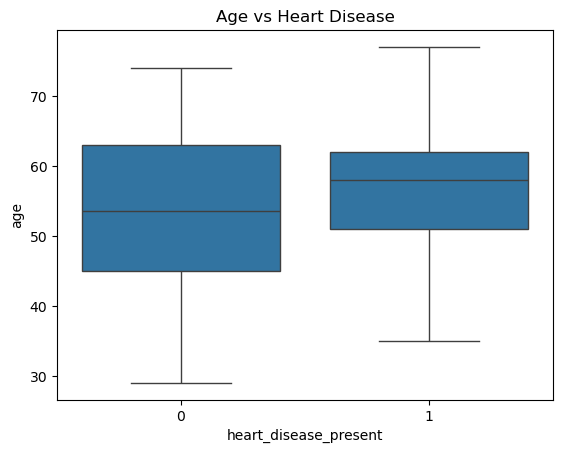

In [33]:
# Bivariate Analysis (Feature vs Target)
sns.boxplot(data=df, x="heart_disease_present", y="age")
plt.title("Age vs Heart Disease")
plt.show()

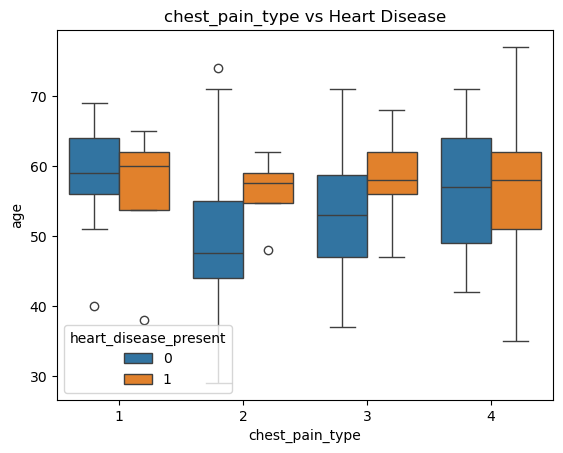

In [48]:
sns.boxplot(data=df, x="chest_pain_type", y="age", hue="heart_disease_present")
plt.title("chest_pain_type vs Heart Disease")
plt.show()

In [50]:
df = df.rename(columns={"serum_cholesterol_mg_per_dl": "cholesterol"})

In [52]:
print(df.columns)

Index(['slope_of_peak_exercise_st_segment', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'cholesterol', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present', 'thal_normal', 'thal_reversible_defect'],
      dtype='object')


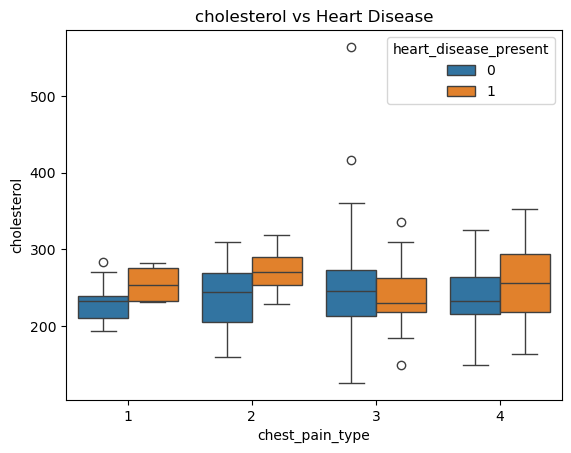

In [54]:
sns.boxplot(data=df, x="chest_pain_type", y="cholesterol", hue="heart_disease_present")
plt.title("cholesterol vs Heart Disease")
plt.show()

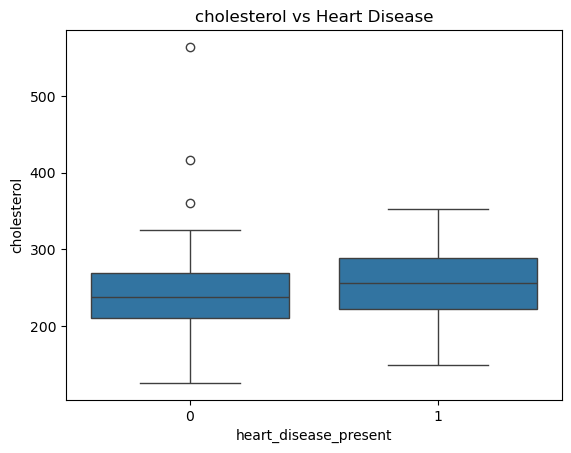

In [56]:
sns.boxplot(data=df, x="heart_disease_present", y="cholesterol")
plt.title("cholesterol vs Heart Disease")
plt.show()

In [58]:
for column in df:
    print(column)

slope_of_peak_exercise_st_segment
resting_blood_pressure
chest_pain_type
num_major_vessels
fasting_blood_sugar_gt_120_mg_per_dl
resting_ekg_results
cholesterol
oldpeak_eq_st_depression
sex
age
max_heart_rate_achieved
exercise_induced_angina
heart_disease_present
thal_normal
thal_reversible_defect


## Data Preprocessing and Feature Engineering.

In [61]:
# Handling the missing values
df.isnull().sum()

slope_of_peak_exercise_st_segment       0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
cholesterol                             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
thal_normal                             0
thal_reversible_defect                  0
dtype: int64

In [63]:
# Step 5: Split features and target
X = df.drop('heart_disease_present', axis=1)
y = df['heart_disease_present']

In [65]:
X

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,cholesterol,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,thal_normal,thal_reversible_defect
0,1,128,2,0,0,2,308,0.0,1,45,170,0,True,False
1,2,110,3,0,0,0,214,1.6,0,54,158,0,True,False
2,1,125,4,3,0,2,304,0.0,1,77,162,1,True,False
3,1,152,4,0,0,0,223,0.0,1,40,181,0,False,True
4,3,178,1,0,0,2,270,4.2,1,59,145,0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2,125,4,2,1,0,254,0.2,1,67,163,0,False,True
176,2,180,4,0,0,1,327,3.4,0,55,117,1,True,False
177,2,125,3,0,0,0,309,1.8,1,64,131,1,False,True
178,1,124,3,2,1,0,255,0.0,1,48,175,0,True,False


In [67]:
y

0      0
1      0
2      1
3      1
4      0
      ..
175    1
176    1
177    1
178    0
179    0
Name: heart_disease_present, Length: 180, dtype: int64

In [69]:
# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [75]:
numeric_features

['slope_of_peak_exercise_st_segment',
 'resting_blood_pressure',
 'chest_pain_type',
 'num_major_vessels',
 'fasting_blood_sugar_gt_120_mg_per_dl',
 'resting_ekg_results',
 'cholesterol',
 'oldpeak_eq_st_depression',
 'sex',
 'age',
 'max_heart_rate_achieved',
 'exercise_induced_angina']

In [77]:
# Pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [79]:
numeric_transformer

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [81]:
# Pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [83]:
categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [85]:
# Combine pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [87]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['slope_of_peak_exercise_st_segment',
                                  'resting_blood_pressure', 'chest_pain_type',
                                  'num_major_vessels',
                                  'fasting_blood_sugar_gt_120_mg_per_dl',
                                  'resting_ekg_results', 'cholesterol',
                                  'oldpeak_eq_st_depression', 'sex', 'age',
                                  'max_heart_rate_achieved',
                                  'exercise_induced_angina']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 [])])

# Feature Selection

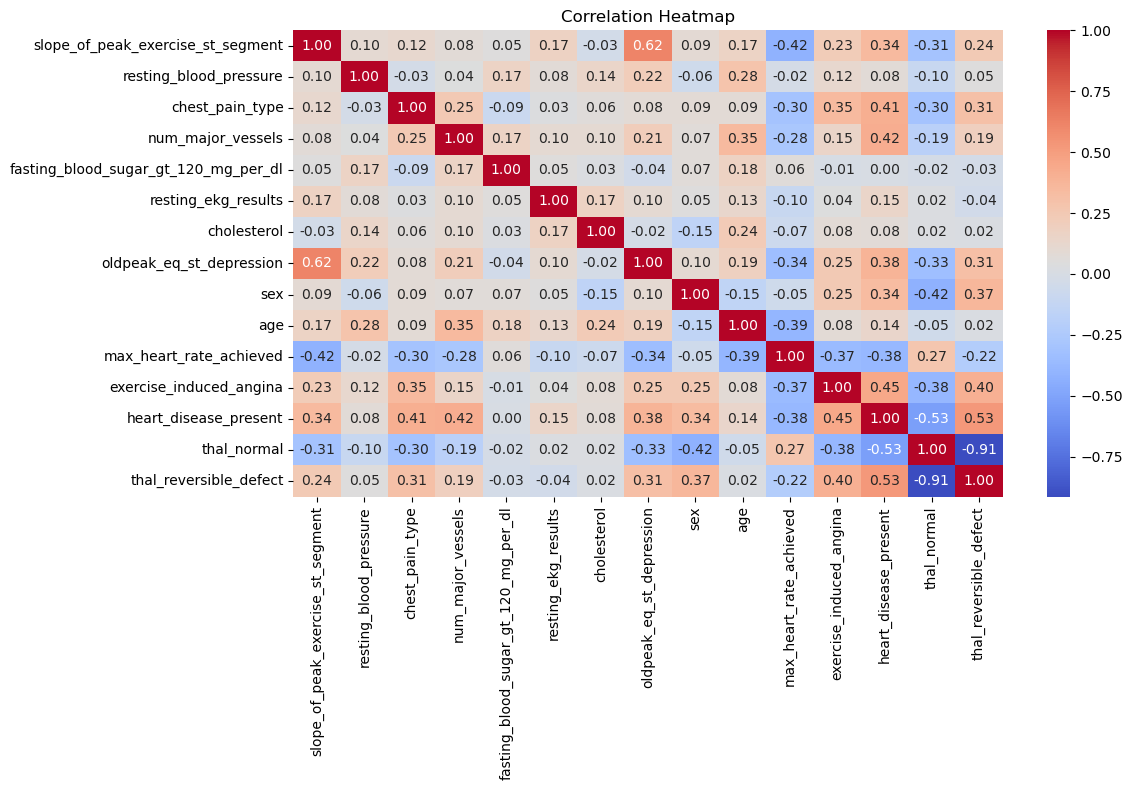

In [90]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Model Creation

In [93]:
# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [95]:
X_train

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,cholesterol,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,thal_normal,thal_reversible_defect
139,1,130,2,0,0,2,219,0.0,1,44,188,0,True,False
0,1,128,2,0,0,2,308,0.0,1,45,170,0,True,False
169,2,110,1,0,0,2,211,1.8,1,64,144,1,True,False
65,1,126,4,0,0,2,282,0.0,1,35,156,1,False,True
98,1,155,3,0,0,0,269,0.8,0,65,148,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,1,160,3,1,0,0,201,0.0,0,54,163,0,True,False
69,2,120,3,3,0,0,188,2.0,1,49,139,0,False,True
48,2,120,2,1,0,2,281,1.4,1,62,103,0,False,True
153,1,112,4,1,0,2,290,0.0,1,44,153,0,True,False


In [97]:
X_test

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,cholesterol,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,thal_normal,thal_reversible_defect
24,1,156,2,0,0,2,245,0.0,1,70,143,0,True,False
173,1,140,4,0,0,0,299,1.6,1,51,173,1,False,True
81,2,120,4,1,0,0,188,1.4,1,54,113,0,False,True
160,1,130,2,0,0,0,266,0.6,1,49,171,0,True,False
35,1,122,4,0,0,2,222,0.0,1,48,186,0,True,False
147,2,134,1,2,0,0,234,2.6,1,61,145,0,True,False
33,1,180,4,0,0,0,325,0.0,0,64,154,1,True,False
126,2,102,4,0,0,2,265,0.6,0,42,122,0,True,False
4,3,178,1,0,0,2,270,4.2,1,59,145,0,False,True
57,2,120,4,2,0,0,267,1.8,1,62,99,1,False,True


In [99]:
y_train

139    0
0      0
169    0
65     1
98     0
      ..
179    0
69     1
48     1
153    1
60     0
Name: heart_disease_present, Length: 144, dtype: int64

In [101]:
 y_test

24     0
173    1
81     1
160    0
35     0
147    1
33     0
126    0
4      0
57     1
150    0
78     1
151    0
79     1
145    0
103    0
90     0
15     1
106    0
31     1
93     1
8      1
176    1
117    1
1      0
37     0
63     0
92     0
83     1
141    0
14     1
66     1
163    1
122    0
44     0
164    0
Name: heart_disease_present, dtype: int64

In [103]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:
X_train_scaled

array([[-0.83939296, -0.02468392, -1.2808703 , ..., -0.68511879,
         0.8819171 , -0.79772404],
       [-0.83939296, -0.14940269, -1.2808703 , ..., -0.68511879,
         0.8819171 , -0.79772404],
       [ 0.79402037, -1.27187163, -2.3919867 , ...,  1.4596009 ,
         0.8819171 , -0.79772404],
       ...,
       [ 0.79402037, -0.64827777, -1.2808703 , ..., -0.68511879,
        -1.13389342,  1.25356634],
       [-0.83939296, -1.14715286,  0.94136251, ..., -0.68511879,
         0.8819171 , -0.79772404],
       [ 0.79402037, -0.9600747 , -0.16975389, ..., -0.68511879,
        -1.13389342,  1.25356634]])

In [107]:
X_test_scaled

array([[-0.83939296,  1.59666009, -1.2808703 , -0.72932496, -0.49130368,
         0.97259753, -0.0572693 , -0.8927209 ,  0.66332496,  1.57284171,
        -0.31943154, -0.68511879,  0.8819171 , -0.79772404],
       [-0.83939296,  0.59890993,  0.94136251, -0.72932496, -0.49130368,
        -1.02817453,  0.94571733,  0.59557791,  0.66332496, -0.38498127,
         1.04820399,  1.4596009 , -1.13389342,  1.25356634],
       [ 0.79402037, -0.64827777,  0.94136251,  0.32090298, -0.49130368,
        -1.02817453, -1.1159774 ,  0.40954056,  0.66332496, -0.07585133,
        -1.68706707, -0.68511879, -1.13389342,  1.25356634],
       [-0.83939296, -0.02468392, -1.2808703 , -0.72932496, -0.49130368,
        -1.02817453,  0.33278106, -0.33460885,  0.66332496, -0.5910679 ,
         0.95702829, -0.68511879,  0.8819171 , -0.79772404],
       [-0.83939296, -0.523559  ,  0.94136251, -0.72932496, -0.49130368,
         0.97259753, -0.48446731, -0.8927209 ,  0.66332496, -0.69411122,
         1.64084606, -0.68

In [109]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

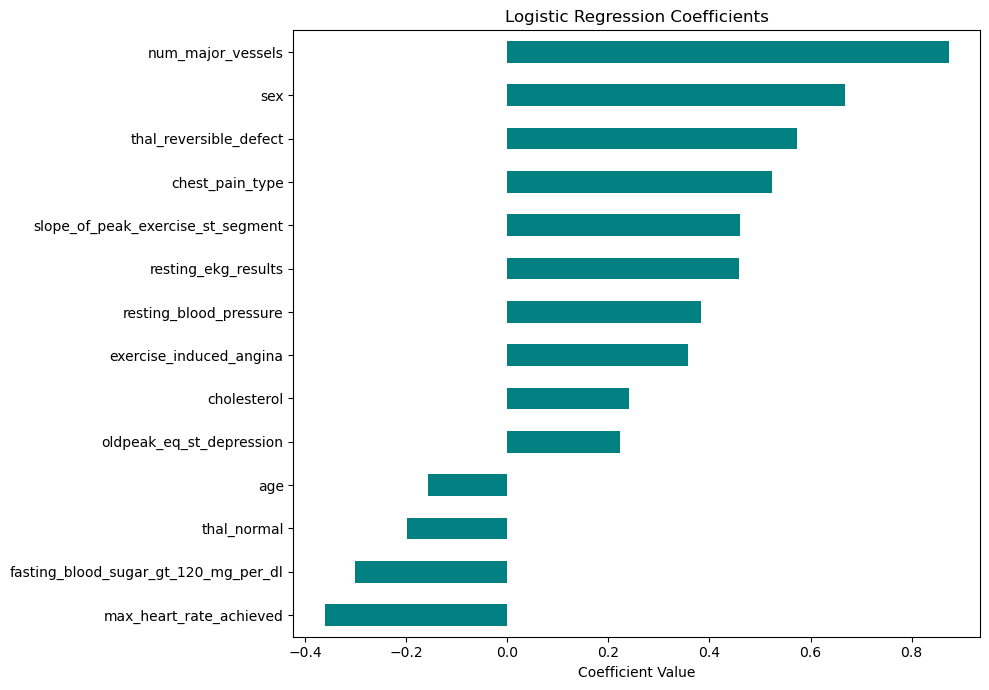

In [111]:
# Feature coefficients
coef_df = pd.Series(clf.coef_[0], index=X.columns).sort_values()
# Plot the coefficients as a horizontal bar chart
plt.figure(figsize=(10, 7))
coef_df.plot(kind="barh", color="teal")
plt.title("Logistic Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()

In [113]:
# Prediction
y_pred = clf.predict(X_test_scaled)

In [115]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

# Evaluation of Model

In [118]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,classification_report,f1_score

In [120]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[16  4]
 [ 2 14]]


In [122]:
recall=recall_score(y_test,y_pred)
recall

0.875

In [124]:
precision=precision_score(y_test,y_pred)
precision

0.7777777777777778

In [126]:
f1score=f1_score(y_test,y_pred)
f1score

0.8235294117647058

In [128]:
acc = accuracy_score(y_test,y_pred)
acc

0.8333333333333334

In [130]:
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       0.78      0.88      0.82        16

    accuracy                           0.83        36
   macro avg       0.83      0.84      0.83        36
weighted avg       0.84      0.83      0.83        36



In [132]:
y_test.value_counts()

heart_disease_present
0    20
1    16
Name: count, dtype: int64

# Task3:-Suggestions to the Hospital to awake the predictions of heart diseases prevent life threats.

## 1. Implement Regular Screening Programs

- Introduce routine cardiovascular checkups, especially for high-risk groups (e.g., elderly, diabetic, hypertensive, obese).
- Include ECG, cholesterol levels, blood pressure, and BMI monitoring.

## 2. Adopt AI-Based Predictive Tools

- Integrate machine learning models into electronic health records (EHR) systems to flag early signs of heart disease.
- Use existing data (like from values.csv and labels.csv) to continuously retrain and improve models.

## 3. Develop a Risk Scoring System

- Alert doctors with AI-based suggestions during consultations.
- Include risk factors such as age, cholesterol, blood pressure, and lifestyle habits in digital decision tools.
- Provide patients with personalized heart disease risk scores based on their health parameters.
- This helps prioritize treatment and follow-up for high-risk individuals.

## 4. Promote Patient Awareness & Lifestyle Management

- Educate patients on the importance of diet, exercise, smoking cessation, and stress management.
- Conduct awareness sessions on:
1) Smoking cessation
2) Healthy diet
3) Regular exercise
4) Stress management
- Organize workshops, seminars, and distribute easy-to-understand guides.

## 5. Improve Data Collection and Quality

- Track outcomes of high-risk patients.
- Update models with real-world hospital data regularly to improve accuracy.
-  Analyze which factors most influence local patient outcomes and adapt screening accordingly.
- Ensure complete and accurate health records for each patient.
- Encourage standardized data entry to support better model performance and analysis.

## 6. Train Medical Staff on Predictive Tools

- Train doctors, nurses, and even front desk staff to recognize early symptoms and signs of cardiac distress.
- Use standardized protocols for urgent escalation of suspected heart issues.
- Educate doctors and nurses on how to interpret and use AI-generated predictions.
- Ensure predictive insights are incorporated into decision-making, not just seen as alerts.

## 7. Set Up Emergency Response Protocols

- Use prediction tools to proactively identify patients at risk of acute cardiac events.
- Ensure timely referrals to cardiologists and have clear protocols for emergency interventions.

## 8. Collaborate with Tech and Research Teams

- Partner with data scientists, universities, and research institutions to enhance prediction models.
- Share anonymized data for external validation and innovation.
- Partner with universities or AI-health startups to develop and continuously improve prediction models.
- Participate in research to stay current with predictive tools and methodologies.

## 9. Monitor and Evaluate Outcomes

- Continuously track patient outcomes to assess the effectiveness of predictive interventions.
- Use feedback to improve both clinical practices and predictive models.